# Visualize Benchmarking additional figures
This script produces visualizations for three toy models (cayley tree, cube lattice and torus lattice) 
using graph embedding methods, such as node2vec, deepwalk and struc2vec  in combination with the dimensionality reduction method tSNE. 

In [4]:
from cartoGRAPHs import * 

from func_load_data import *
from func_visual_properties import * 
from func_calculations import * 
from func_embed_plot import * 
from func_exportVR import * 

In [2]:
#################
# N O D E S
#################
opacity_nodes = 0.9
node_edge_col = '#696969' 

gray_colours = '#696969'
size = 70

#################
# E D G E S
#################
edge_width = 2.0
edge_color = '#696969' 
opacity_edges = 0.3

# Cayley Tree

#### NODE2VEC
+ https://towardsdatascience.com/node2vec-embeddings-for-graph-data-32a866340fef
+ https://github.com/eliorc/Medium/blob/master/Nod2Vec-FIFA17-Example.ipynb
+ https://arxiv.org/pdf/1607.00653.pdf

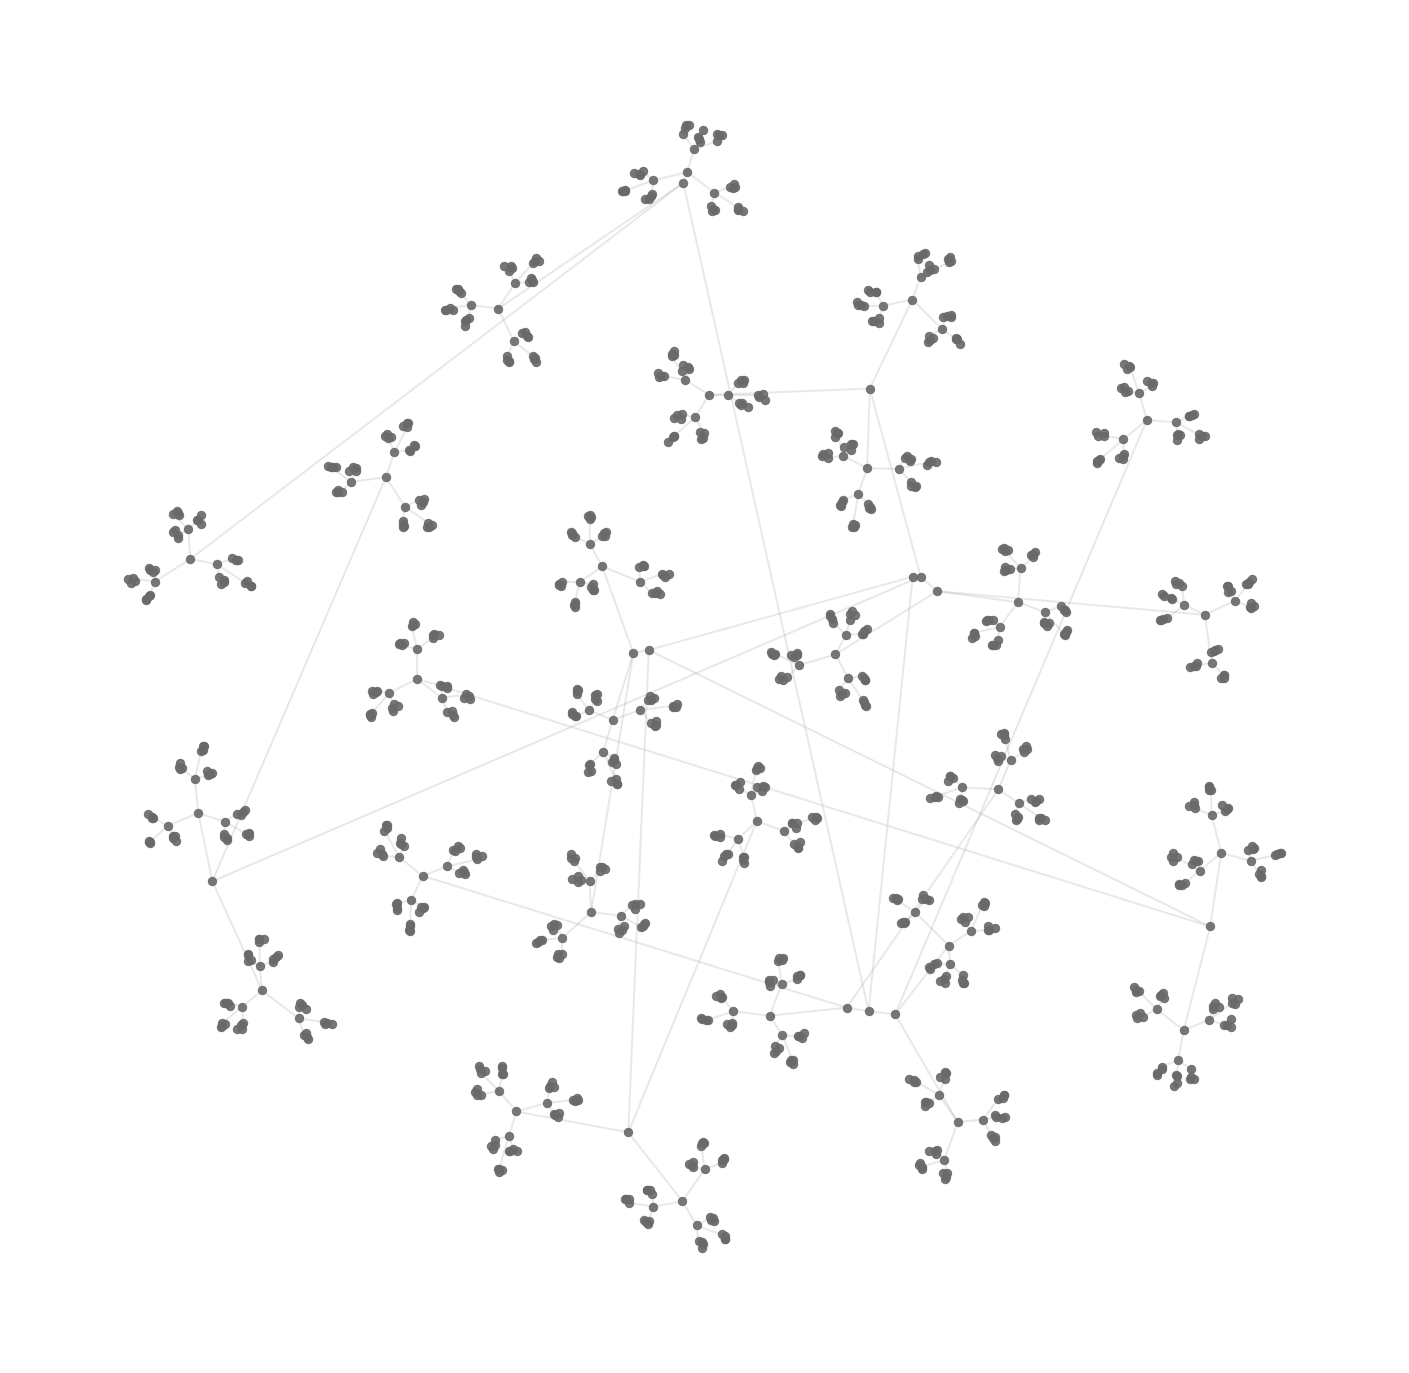

In [128]:
organism = 'tree'

n = 1093
r = 3
G = nx.full_rary_tree(r,n)

walk_lngth = 50
num_wlks = 10
wrks = 1
dmns = 50 # len(G.nodes())

node2vec = Node2Vec(G, dimensions=dmns, walk_length=walk_lngth, num_walks=num_wlks, workers=wrks, quiet=True)
model = node2vec.fit(window=10, min_count=1)
embeddings = np.array([model.wv[str(x)] for x in G.nodes()])

tsne = TSNE(n_components=2, random_state=42,
           perplexity = 50,
           metric = 'cosine',
           square_distances=True)

tsne2D = tsne.fit_transform(embeddings)
posG = dict(zip(list(G.nodes()),tsne2D))

plt.figure(figsize=(25,25))

nx.draw_networkx_nodes(G, posG, node_color = gray_colours, node_size= size, alpha = opacity_nodes)
nx.draw_networkx_edges(G, posG, width = edge_width, edge_color = edge_color, alpha = opacity_edges*0.5)

plt.box(False)
plt.savefig('output_plots/benchmark/2DPortrait_node2vec_dmns'+str(dmns)+'_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism+'.pdf')
plt.savefig('output_plots/benchmark/2DPortrait_node2vec_dmns'+str(dmns)+'_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism+'.png')
plt.show()

#### DEEPWALK
+ https://github.com/shenweichen/GraphEmbedding

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


Learning embedding vectors...
Learning embedding vectors done!


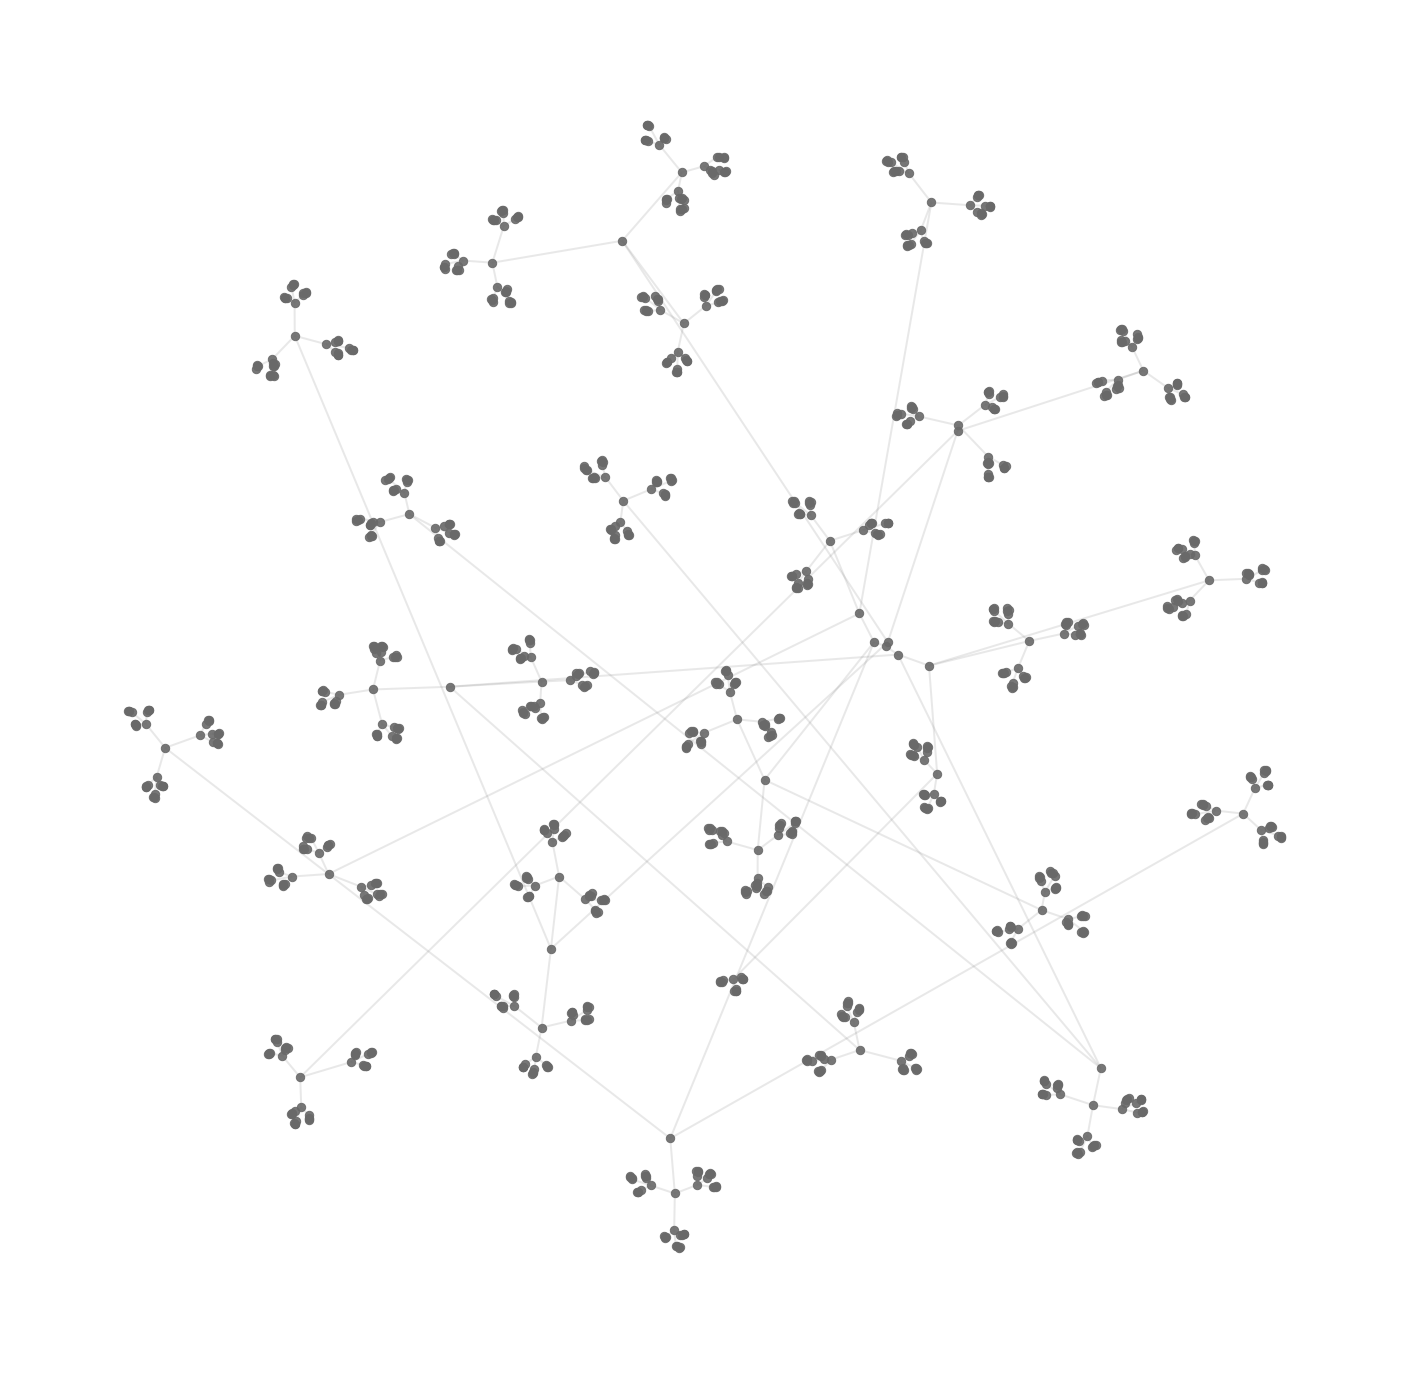

In [6]:
organism = 'tree'

n = 1093
r = 3
G = nx.full_rary_tree(r,n)
nx.write_edgelist(G, 'temp_G_edges.txt')
G_new = nx.read_edgelist('temp_G_edges.txt')
G = G_new

walk_lngth = 50
num_wlks = 10
wrks = 1
dmns = 50 # len(G.nodes())

model = DeepWalk(G_new,walk_length=walk_lngth , num_walks=num_wlks, workers=wrks)#init model
model.train(window_size=5,iter=3)# train model
embeddings = model.get_embeddings()# get embedding vectors

tsne = TSNE(n_components=2, random_state=42,
           perplexity = 50,
           metric = 'cosine',
           square_distances=True)

tsne2D = tsne.fit_transform(list(embeddings.values()))
posG = dict(zip(list(G.nodes()),tsne2D))

d_clos = dict(nx.closeness_centrality(G))
d_colours = color_nodes_from_dict(G, d_clos, palette = 'YlOrRd')
clos_colours = list(d_colours.values())

plt.figure(figsize=(25,25))

nx.draw_networkx_nodes(G, posG, node_color = gray_colours, node_size= size, alpha = opacity_nodes)
nx.draw_networkx_edges(G, posG, width = edge_width, edge_color = edge_color, alpha = opacity_edges*0.5)

plt.box(False)
plt.savefig('output_plots/benchmark/2DPortrait_deepwalk_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism+'.pdf')
plt.savefig('output_plots/benchmark/2DPortrait_deepwalk_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism+'.png')
plt.show()

#### Struc2Vec
+ https://github.com/shenweichen/GraphEmbedding
+ https://blog.acolyer.org/2017/09/15/struc2vec-learning-node-representations-from-structural-identity/

In [5]:
organism = 'tree'

n = 1093
r = 3
G = nx.full_rary_tree(r,n)
nx.write_edgelist(G, 'temp_G_edges.txt')
G_new = nx.read_edgelist('temp_G_edges.txt')
G = G_new

walk_lngth = 50
num_wlks = 10
wrks = 1
dmns = 50 # len(G.nodes())

model = model = Struc2Vec(G, walk_length=walk_lngth , num_walks=num_wlks, workers=wrks , verbose=False) #init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors

/Users/chris/Desktop/Github/cartoGRAPHs/ge/models/struc2vec.py:299: RuntimeWarning:

invalid value encountered in double_scalars



Learning representation...
Learning representation done!


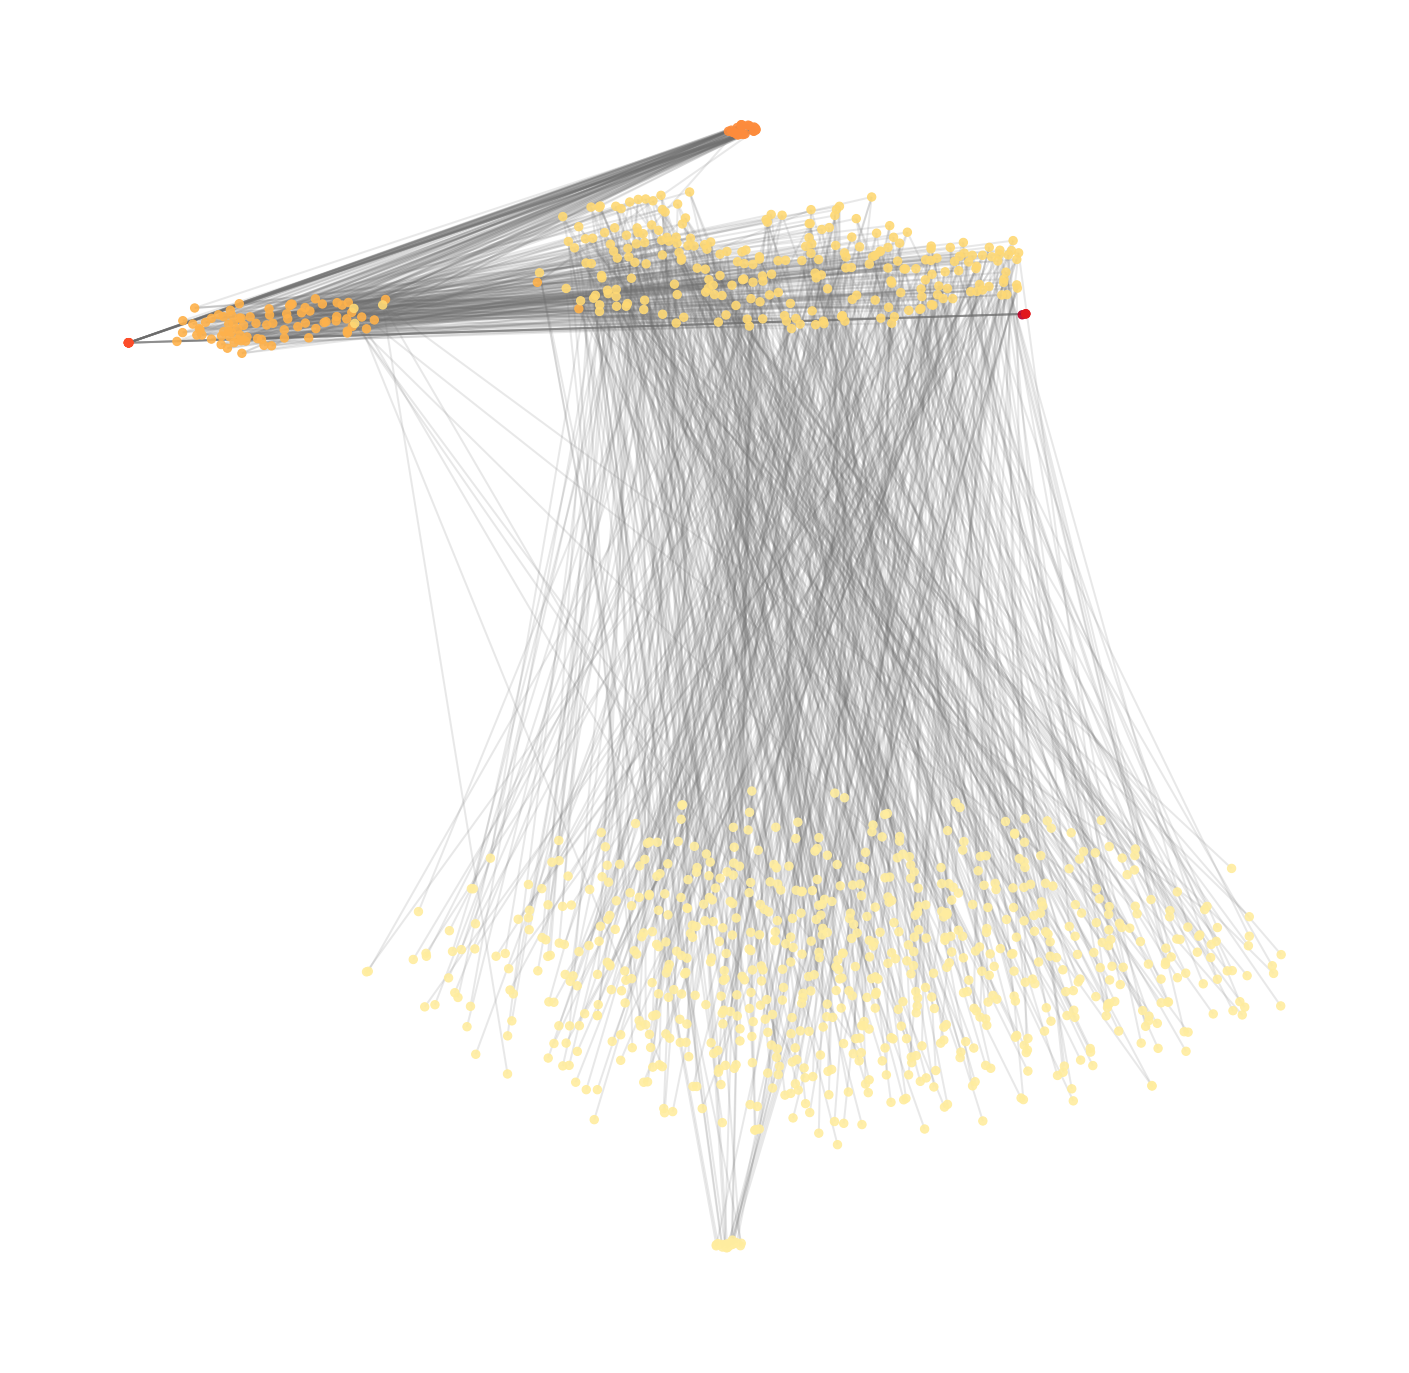

In [13]:
DM = pd.DataFrame(embeddings).T

tsne = TSNE(n_components=2, random_state=42,
           perplexity = 50,
           metric = 'cosine',
           square_distances=True)

tsne2D = tsne.fit_transform(DM)
posG = posG = dict(zip(list(G.nodes()),tsne2D))

d_clos = dict(nx.closeness_centrality(G))
d_colours = color_nodes_from_dict(G, d_clos, palette = 'YlOrRd')
clos_colours = list(d_colours.values())

plt.figure(figsize=(25,25))

nx.draw_networkx_nodes(G, posG, node_color = clos_colours, node_size= size, alpha = opacity_nodes)
nx.draw_networkx_edges(G, posG, width = edge_width, edge_color = edge_color, alpha = opacity_edges*0.5)

plt.box(False)
plt.savefig('output_plots/benchmark/2DPortrait_struc2vec_dmns'+str(dmns)+'_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism+'.pdf')
plt.savefig('output_plots/benchmark/2DPortrait_struc2vec_dmns'+str(dmns)+'_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism+'.png')
plt.show()

# Cube Lattice

#### NODE2VEC
+ https://towardsdatascience.com/node2vec-embeddings-for-graph-data-32a866340fef
+ https://github.com/eliorc/Medium/blob/master/Nod2Vec-FIFA17-Example.ipynb

In [113]:
organism = 'grid'

G = nx.grid_graph([10,10,10],periodic=False)
# converting node labels to integers 
start = 1
G = nx.convert_node_labels_to_integers(G,first_label=start)

walk_lngth = 50
num_wlks = 10
wrks = 1
dmns = 50 # len(G.nodes())

node2vec = Node2Vec(G, dimensions=dmns, walk_length=walk_lngth, num_walks=num_wlks, workers=wrks, quiet=True)
model = node2vec.fit(window=10, min_count=1)
embeddings = np.array([model.wv[str(x)] for x in G.nodes()])

tsne = TSNE(n_components=3, random_state=42,
           perplexity = 50,
           metric = 'cosine',
           square_distances=True)
tsne3D = tsne.fit_transform(embeddings)
posG = dict(zip(list(G.nodes()),tsne3D))

d_clos = dict(nx.closeness_centrality(G))
d_colours = color_nodes_from_dict(G, d_clos, palette = 'YlOrRd')
clos_colours = list(d_colours.values())

scheme = 'light'

umap_nodes = get_trace_nodes_3D(posG, None, clos_colours, int(size/20),opacity_nodes)
umap_edges = get_trace_edges_3D(G, posG, edge_colorlight, opac = opacity_edges, linewidth= edge_width)
data = [umap_edges,umap_nodes]
fname = 'output_plots/benchmark/3DPortrait_node2vec_dmns'+str(dmns)+'_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism

plot_3D(data, fname, scheme)

'output_plots/benchmark/3DPortrait_node2vec_dmns50_walklen50_numwalks10_grid.html'

#### DEEPWALK
+ https://github.com/shenweichen/GraphEmbedding

In [114]:
from ge import DeepWalk

In [115]:
organism = 'grid'

G = nx.grid_graph([10,10,10],periodic=False)
# converting node labels to integers 
start = 1
G = nx.convert_node_labels_to_integers(G,first_label=start)

nx.write_edgelist(G, 'G_edges.txt')
G_new = nx.read_edgelist('G_edges.txt')
G = G_new

model = DeepWalk(G_new,walk_length=10,num_walks=80,workers=1)#init model
model.train(window_size=5,iter=3)# train model
embeddings = model.get_embeddings()# get embedding vectors

tsne = TSNE(n_components=3, random_state=42,
           perplexity = 50,
           metric = 'cosine',
           square_distances=True)
tsne3D = tsne.fit_transform(list(embeddings.values()))
posG = dict(zip(list(G.nodes()),tsne3D))

d_clos = dict(nx.closeness_centrality(G))
d_colours = color_nodes_from_dict(G, d_clos, palette = 'YlOrRd')
clos_colours = list(d_colours.values())

scheme = 'light'

umap_nodes = get_trace_nodes_3D(posG, None, clos_colours, int(size/20),opacity_nodes)
umap_edges = get_trace_edges_3D(G, posG, edge_colorlight, opac = opacity_edges, linewidth= edge_width)
data = [umap_edges,umap_nodes]
fname = 'output_plots/benchmark/3DPortrait_deepwalk_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism

plot_3D(data, fname, scheme)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


Learning embedding vectors...
Learning embedding vectors done!


'output_plots/benchmark/3DPortrait_deepwalk_walklen50_numwalks10_grid.html'

#### Struc2Vec
+ https://github.com/shenweichen/GraphEmbedding
+ https://blog.acolyer.org/2017/09/15/struc2vec-learning-node-representations-from-structural-identity/

In [119]:
organism = 'grid'

G = nx.grid_graph([10,10,10],periodic=False)
# converting node labels to integers 
start = 1
G = nx.convert_node_labels_to_integers(G,first_label=start)

nx.write_edgelist(G, 'temp_G_edges.txt')
G_new = nx.read_edgelist('temp_G_edges.txt')
G = G_new

walk_lngth = 10
num_wlks = 100
wrks = 4

model = model = Struc2Vec(G, walk_length=walk_lngth , num_walks=num_wlks, workers=wrks , verbose=False) #init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors

tsne = TSNE(n_components=3, random_state=42,
           perplexity = 80,
           metric = 'cosine',
           square_distances=True)
tsne3D = tsne.fit_transform(list(embeddings.values()))
posG = dict(zip(list(G.nodes()),tsne3D))

d_clos = dict(nx.closeness_centrality(G))
d_colours = color_nodes_from_dict(G, d_clos, palette = 'YlOrRd')
clos_colours = list(d_colours.values())

scheme = 'light'

umap_nodes = get_trace_nodes_3D(posG, None, clos_colours, int(size/20),opacity_nodes)
umap_edges = get_trace_edges_3D(G, posG, edge_colorlight, opac = opacity_edges, linewidth= edge_width)
data = [umap_edges,umap_nodes]
fname = 'output_plots/benchmark/3DPortrait_Struc2Vec_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism

plot_3D(data, fname, scheme)

Learning representation...
Learning representation done!


'output_plots/benchmark/3DPortrait_Struc2Vec_walklen10_numwalks100_grid.html'

# Torus Lattice

#### NODE2VEC
+ https://towardsdatascience.com/node2vec-embeddings-for-graph-data-32a866340fef
+ https://github.com/eliorc/Medium/blob/master/Nod2Vec-FIFA17-Example.ipynb

In [112]:
organism = 'torus'

G = nx.grid_2d_graph(44,22,periodic=True)
# converting node labels to integers 
start = 1
G = nx.convert_node_labels_to_integers(G,first_label=start)

walk_lngth = 50
num_wlks = 10
wrks = 1
dmns = 50 # len(G.nodes())

node2vec = Node2Vec(G, dimensions=dmns, walk_length=walk_lngth, num_walks=num_wlks, workers=wrks, quiet=True)
model = node2vec.fit(window=10, min_count=1)
embeddings = np.array([model.wv[str(x)] for x in G.nodes()])

tsne = TSNE(n_components=3, random_state=42,
           perplexity = 50,
           metric = 'cosine',
           square_distances=True)
tsne3D = tsne.fit_transform(embeddings)
posG = dict(zip(list(G.nodes()),tsne3D))

d_clos = dict(nx.closeness_centrality(G))
d_colours = color_nodes_from_dict(G, d_clos, palette = 'YlOrRd')
clos_colours = list(d_colours.values())

scheme = 'light'

umap_nodes = get_trace_nodes_3D(posG, None, clos_colours, int(size/20),opacity_nodes)
umap_edges = get_trace_edges_3D(G, posG, edge_colorlight, opac = opacity_edges, linewidth= edge_width)
data = [umap_edges,umap_nodes]
fname = 'output_plots/benchmark/3DPortrait_node2vec_dmns'+str(dmns)+'_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism

plot_3D(data, fname, scheme)

'output_plots/benchmark/3DPortrait_node2vec_dmns50_walklen50_numwalks10_torus.html'

#### DEEPWALK
+ https://github.com/shenweichen/GraphEmbedding

In [82]:
from ge import DeepWalk

In [111]:
organism = 'torus'

G = nx.grid_2d_graph(44,22,periodic=True)
start = 1
G = nx.convert_node_labels_to_integers(G,first_label=start)

nx.write_edgelist(G, 'G_edges.txt')
G_new = nx.read_edgelist('G_edges.txt')
G = G_new


walk_lngth = 100
num_wlks = 80
wrks = 1

model = DeepWalk(G_new,walk_length=walk_lngth,num_walks=num_wlks,workers=wrks)#init model
model.train(window_size=5,iter=3)# train model
embeddings = model.get_embeddings()# get embedding vectors

tsne = TSNE(n_components=3, random_state=42,
           perplexity = 50,
           metric = 'cosine',
           square_distances=True)
tsne3D = tsne.fit_transform(list(embeddings.values()))
posG = dict(zip(list(G.nodes()),tsne3D))

d_clos = dict(nx.closeness_centrality(G))
d_colours = color_nodes_from_dict(G, d_clos, palette = 'YlOrRd')
clos_colours = list(d_colours.values())

scheme = 'light'

umap_nodes = get_trace_nodes_3D(posG, None, clos_colours, int(size/20),opacity_nodes)
umap_edges = get_trace_edges_3D(G, posG, edge_colorlight, opac = opacity_edges, linewidth= edge_width)
data = [umap_edges,umap_nodes]
fname = 'output_plots/benchmark/3DPortrait_deepwalk_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism

plot_3D(data, fname, scheme)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s finished


Learning embedding vectors...
Learning embedding vectors done!


'output_plots/benchmark/3DPortrait_deepwalk_walklen100_numwalks80_torus.html'

#### STRUC2VEC
+ https://github.com/shenweichen/GraphEmbedding
+ https://blog.acolyer.org/2017/09/15/struc2vec-learning-node-representations-from-structural-identity/

In [102]:
from ge import Struc2Vec

In [108]:
organism = 'torus'

G = nx.grid_2d_graph(44,22,periodic=True)
start = 1
G = nx.convert_node_labels_to_integers(G,first_label=start)

nx.write_edgelist(G, 'temp_G_edges.txt')
G_new = nx.read_edgelist('temp_G_edges.txt')
G = G_new

walk_lngth = 80
num_wlks = 100
wrks = 4

model = model = Struc2Vec(G, walk_length=walk_lngth , num_walks=num_wlks, workers=wrks , verbose=False) #init model
model.train(window_size = 5, iter = 3)# train model
embeddings = model.get_embeddings()# get embedding vectors

tsne = TSNE(n_components=3, random_state=42,
           perplexity = 50,
           metric = 'cosine',
           square_distances=True)
tsne3D = tsne.fit_transform(list(embeddings.values()))
posG = dict(zip(list(G.nodes()),tsne3D))

d_clos = dict(nx.closeness_centrality(G))
d_colours = color_nodes_from_dict(G, d_clos, palette = 'YlOrRd')
clos_colours = list(d_colours.values())

scheme = 'light'

umap_nodes = get_trace_nodes_3D(posG, None, clos_colours, int(size/20),opacity_nodes)
umap_edges = get_trace_edges_3D(G, posG, edge_colorlight, opac = opacity_edges, linewidth= edge_width)
data = [umap_edges,umap_nodes]
fname = 'output_plots/benchmark/3DPortrait_Struc2Vec_walklen'+str(walk_lngth)+'_'+'numwalks'+str(num_wlks)+'_'+organism

plot_3D(data, fname, scheme)

Learning representation...
Learning representation done!


'output_plots/benchmark/3DPortrait_Struc2Vec_walklen80_numwalks100_torus.html'